    # Google Cloud Platform Basics
    ## Contents
    ##### 1. Install Google Cloud in the local machine
    ##### 2. Adding and deleting components
    ##### 3. Creating container clusters
    ##### 4. Creating dataproc clusters
    ##### 5. Creating buckets
    ##### 6. Copying files into buckets

    ---


    ### 1. Installing Google Cloud in the local machine

    Install the Google Cloud SDK to use the tools and libraries in Google Genomics, Google Compute Engine, Google Cloud Storage, and BigQuery.  

    The SDK includes gcloud, gsutil, and bq tools.
    Download Google Cloud SDK

        https://cloud.google.com/sdk/downloads

    Downloaded : 


    Mac OS X (x86_64)	google-cloud-sdk-127.0.0-darwin-x86_64.tar.gz	8.7 MB

        $ ./google-cloud-sdk/install.sh

    Welcome to the Google Cloud SDK!

    To help improve the quality of this product, we collect anonymized usage data
     and anonymized stacktraces when crashes are encountered.. You may choose to opt
     out of this collection now (by choosing 'N' at the below prompt), or at any
     time in the future by running the following command:
        gcloud config set disable_usage_reporting true

    Do you want to help improve the Google Cloud SDK (Y/n)?  Y


    Your current Cloud SDK version is: 127.0.0
    The latest available version is: 127.0.0

    Component

    Status|Name |ID|Size
    :-----|--------------|------------:
     Not Installed | kubectl|kubectl|11.2 MiB
    Installed|BigQuery Command Line Tool|bq|< 1 MiB 
    Installed|Cloud SDK Core Libraries|core|4.9 MiB 
    Installed|Cloud Storage Command Line Tool|gsutil|2.8 MiB 
    Installed|Default set of gcloud commands|gcloud                   |            



    Install Components : gcloud components install COMPONENT_ID  
    Remove Components : gcloud components remove COMPONENT_ID  

    To update your SDK installation to the latest version [127.0.0], run:  
    $ gcloud components update

        Modify profile to update your $PATH and enable shell command 
        completion? (Y/n)?  Y

        The Google Cloud SDK installer will now prompt you to update an rc 
        file to bring the Google Cloud CLIs into your environment.  

        Enter a path to an rc file to update, or leave blank to use 
        [/Users/surajjoshi/.bash_profile]:

        Backing up [/Users/surajjoshi/.bash_profile] to [/Users/surajjoshi/.bash_profile.backup].
        [/Users/surajjoshi/.bash_profile] has been updated.  
        Start a new shell for the changes to take effect.    

        For more information on how to get started, please visit:
          https://cloud.google.com/sdk/docs/quickstarts

        $ ./google-cloud-sdk/bin/gcloud init
        Welcome! This command will take you through the configuration of gcloud.

        Your current configuration has been set to: [default]

        Network diagnostic detects and fixes local network connection issues.
        Checking network connection...done.                                             
        Reachability Check passed.
        Network diagnostic (1/1 checks) passed.

        You must log in to continue. Would you like to log in (Y/n)?  Y

        Your browser has been opened to visit:

            https://accounts.google.com/o/oauth2/auth?redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&prompt=select_account&response_type=code&client_id=32555940559.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute&access_type=offline


        You are logged in as: [ufsggenomics@gmail.com].

        Your current project has been set to: [angelic-surfer-143303].

        Do you want to configure Google Compute Engine 
        (https://cloud.google.com/compute) settings (Y/n)?  Y

        Which Google Compute Engine zone would you like to use as project 
        default?
        If you do not specify a zone via a command line flag while working 
        with Compute Engine resources, the default is assumed.
         [1] asia-east1-b
         [2] asia-east1-c
         [3] asia-east1-a
         [4] europe-west1-d
         [5] europe-west1-c
         [6] europe-west1-b
         [7] us-central1-a
         [8] us-central1-b
         [9] us-central1-f
         [10] us-central1-c
         [11] us-east1-b
         [12] us-east1-d
         [13] us-east1-c
         [14] us-west1-b
         [15] us-west1-a
         [16] Do not set default zone
        Please enter numeric choice or text value (must exactly match list 
        item):    
        Please enter a value between 1 and 16, or a value present in the list:  15

        Your project default Compute Engine zone has been set to [us-west1-a].
        You can change it by running [gcloud config set compute/zone NAME].

        Your project default Compute Engine region has been set to [us-west1].
        You can change it by running [gcloud config set compute/region NAME].

        Created a default .boto configuration file at [/Users/surajjoshi/.boto]. See this file and
        [https://cloud.google.com/storage/docs/gsutil/commands/config] for more
        information about configuring Google Cloud Storage.
        Your Google Cloud SDK is configured and ready to use!

        * Commands that require authentication will use ufsggenomics@gmail.com by default
        * Commands will reference project `angelic-surfer-143303` by default
        * Compute Engine commands will use region `us-west1` by default
        * Compute Engine commands will use zone `us-west1-a` by default

        Run `gcloud help config` to learn how to change individual settings

        This gcloud configuration is called [default]. You can create additional configurations if you work with multiple accounts and/or projects.
        Run `gcloud topic configurations` to learn more.

        Some things to try next:

        * Run `gcloud --help` to see the Cloud Platform services you can interact with. And run `gcloud help COMMAND` to get help on any gcloud command.
        * Run `gcloud topic -h` to learn about advanced features of the SDK like arg files and output formatting

    ### Creating new instance
    Surajs-MacBook-Pro:~ surajjoshi$ gcloud compute instances create test-instance --custom-cpu 6 --custom-memory 6  

    Created [https://www.googleapis.com/compute/v1/projects/angelic-surfer-143303/zones/us-west1-a/instances/test-instance].  

    NAME           ZONE        MACHINE_TYPE               PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS  

    test-instance  us-west1-a  custom (6 vCPU, 6.00 GiB)               10.138.0.2   104.198.13.63  RUNNING

### Creating a bucket and adding files to a bucket from another bucket within google cloud storage

1.On the home page, click on the products and services right next to where it says Google Cloud Platform.

2.Select Storage,then click on Create buckets to create a bucket.

3.Go to this link to get to Phase-1 1000 genome bucket 

https://console.cloud.google.com/storage/browser/genomics-public-data/1000-genomes/vcf/

4.On the right hand corner of a file, click on the ? to copy the files to your bucket.

5.On the destination put your bucket location to copy that file in the following format:

bucket_1_640/upload_1/Copy of ALL.chrY.phase1_samtools_si.20101123.snps.low_coverage.genotypes.vcf

7.Refresh on your bucket to see the changes.

#### Resources for published data

http://googlegenomics.readthedocs.io/en/latest/use_cases/discover_public_data/index.html

#### Transferring files from TCGA to Google Cloud Storage

https://github.com/isb-cgc/ISB-CGC-data-proc

This is one of the location for transferring files from tcga project to the google cloud storage

https://bigquery.cloud.google.com/dataset/isb-cgc:tcga_201510_alpha

 

#### Enabling the Google Cloud Platform API

https://console.developers.google.com/apis/api/compute_component/overview?project=angelic-surfer-143303&pli=1

Press enable

Once that is done, go to Credentials

640_Project- account name
account ID-id-40-project



### Installing SDK installer

https://cloud.google.com/sdk/downloads

This needs to be installed to use the tools and libraries in Google genomics,google compute engine, google cloud server and Bigquery.

### Bioconductor Setup and Guidelines

https://github.com/Bioconductor/GoogleGenomics

### Apache Spark Facts:
    
http://spark.apache.org/faq.html

#### Spark Examples:
https://github.com/googlegenomics/spark-examples

### Connecting to Spark and Hadoop

Running the example cluster documentation:

http://googlegenomics.readthedocs.io/en/latest/use_cases/compute_principal_coordinate_analysis/1-way-pca.html#id2

   

#### Creating clusters ( step by step)

Go the project, homepage and then create cluster.

## Step by Step : 
## "Compute Principal Coordinate Analysis" tutorial  in Google Genomics: with updates
http://googlegenomics.readthedocs.io/en/latest/use_cases/compute_principal_coordinate_analysis/1-way-pca.html

Objective : Computing principal components from genetic data using Google cloud platform and Spark

Tools used : 
    Google Cloud platform 
    Spark 2.0
    Scala 2.11.8
    Illumina Platinum Genomes database : http://www.illumina.com/platinumgenomes/

Build : Spark master Google Compute Engine virtual machine

Prerequisite : 
    An upgraded Google Cloud account
    A bucket folder name created under the Storage menu.(see above for bucket creation)


Principal Coordinate Analysis counts the number of variants two samples have in common. These counts are then placed into an NxN matrix where N is the number of samples in the variant set. The matrix is centered, scaled, and then the first two principal components are computed for each individual.

#### Setup

Create a Spark cluster using Google Cloud Dataproc. This can be done using the Cloud Platform Console or the following gcloud command:

    gcloud beta dataproc clusters create cluster-1 --scopes cloud-platform

ssh to the master.

    gcloud compute ssh cluster-1-m  # -m to get into 

#### Note : 
The reference tutorial uses Spark 1.0 and Scala 2.10.4.  Below is the updated code with current version (given above) for both.

#### Install sbt.

    echo "deb https://dl.bintray.com/sbt/debian /" | sudo tee -a /etc/apt/sources.list.d/sbt.list
    sudo apt-key adv --keyserver hkp://keyserver.ubuntu.com:80 --recv 642AC823
    sudo apt-get install apt-transport-https
    sudo apt-get update
    sudo apt-get install sbt

#### Clone the github repository.

    sudo apt-get install git
    git clone https://github.com/googlegenomics/spark-examples.git

#### Compile the Jar.

    cd spark-examples
    # Edit the build.sbt file. Change version to 2.0 and scalaVersion to 2.11.8. Save the file and exit.
    
    sbt assembly
    cp target/scala-2.11/googlegenomics-spark-examples-assembly-*.jar ~/
    cd ~/

#### Run the job

    spark-submit \
      --class com.google.cloud.genomics.spark.examples.VariantsPcaDriver \
      --conf spark.shuffle.spill=true \
      googlegenomics-spark-examples-assembly-2.0.jar \
      --variant-set-id 3049512673186936334 \
      --references chr17:41196311:41277499 \
      --output-path gs://Bucket-Name/output/platinum-genomes-brca1-pca.tsv



### Using the output from the PCA to visualize the data
Following is the R code which uses the output from the Step by Step tutorial above and visualize it.

    pca_1kg <- read.table("platinum-genomes-brca1-pca.tsv", col.names=c("Sample", "PC1", "PC2", "Delta"))
    pca_1kg

    require(scales) # for scientific_format()
    require(ggplot2)
    ggplot(pca_1kg) +
      geom_point(aes(x=PC1, y=PC2)) +
      xlab("principal component 1") +
      ylab("principal component 2") +
      ggtitle("Principal Coordinate Analysis upon 1,000 Genomes")


![PCA Graph](https://github.com/rpoudel3/Google_Genomics/blob/master/PCA_graph1.png)

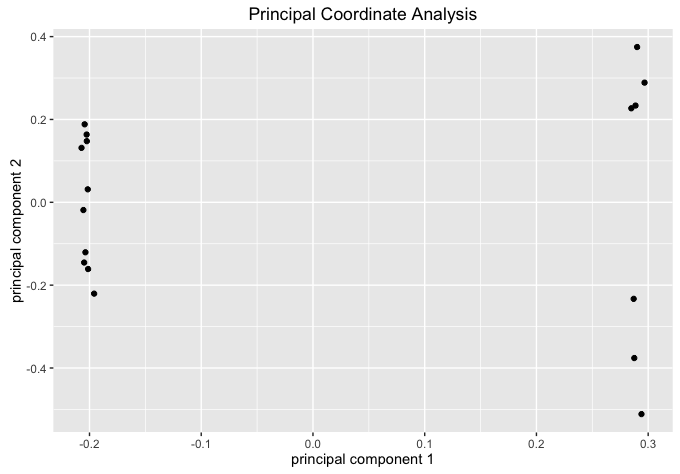

In [8]:
from IPython.display import Image
Image(filename='PCA_graph1.png')

### Computing Principal Coordinate Analysis in 1000 Genome Dataset

#### Uploading Variants into Google Cloud Storage

Upload the 1000 genome phase-1 variant data set( housed in google genomics as a public dataset)
Link is here- https://console.cloud.google.com/storage/browser/genomics-public-data/1000-genomes/vcf/
to our own google genomics bucket using the google cloud shell.

Step 1: Open the Gcloud shell in the console.
    
Step 2: Enter the following command to transfer the data:
        
    $ gsutil cp \
    gs://genomics-public-data/1000-genomes/*.vcf \
    gs://sept-bucket/1000_genomes_phase_1/vcf/

#### Loading Genomic Variants Tutorial Link

https://cloud.google.com/genomics/v1/load-variants  

ufsggenomics@genomics640:~$ gcloud alpha genomics datasets create --name "1000-genome-phase-1"
    
    Created dataset [1000-genome-phase-1, id: 9870341871903797376].


ufsggenomics@genomics640:~$ gcloud alpha genomics variantsets create \
>   --dataset-id 9870341871903797376 \
>   --name 1000-genome-phase-1-variants
Created variant set [1000-genome-phase-1-variants, id: 17430455294296389187] belonging to dataset [id: 9870341871903797376].


#### Import your VCFs from Google Cloud Storage to your Google Genomics dataset

$ gcloud alpha genomics variants import \
  
  --variantset-id  17430455294296389187 \
  
  --source-uris gs://septbucket/1000_genomes_phase_1/vcf/*.vcf

Output:
    
done: false
name: operations/COD-u8zSDRCLvLTABRjg8PCpttjFo6IB

gcloud alpha genomics variantsets export \
  17430455294296389187 \
  1000_genomes_variants \
  --bigquery-dataset 9870341871903797376 
done: false
name: operations/COD-u8zSDRCLvLTABRjg8PCpttjFo6IB


#### Install sbt.

    echo "deb https://dl.bintray.com/sbt/debian /" | sudo tee -a /etc/apt/sources.list.d/sbt.list
    sudo apt-key adv --keyserver hkp://keyserver.ubuntu.com:80 --recv 642AC823
    sudo apt-get install apt-transport-https
    sudo apt-get update
    sudo apt-get install sbt

#### Clone the github repository.

    sudo apt-get install git
    git clone https://github.com/googlegenomics/spark-examples.git

#### Compile the Jar.

    cd spark-examples
    # Edit the build.sbt file. Change version to 2.0 and scalaVersion to 2.11.8. Save the file and exit.
    
    sbt assembly
    cp target/scala-2.11/googlegenomics-spark-examples-assembly-*.jar ~/
    cd ~/

#### Run the job

    spark-submit \
      --class com.google.cloud.genomics.spark.examples.VariantsPcaDriver \
      --conf spark.shuffle.spill=true \
      googlegenomics-spark-examples-assembly-2.0.jar \
      --variant-set-id 17430455294296389187 \
      --references chr17:41196311:41277499 \
      --output-path gs://septbucket/output/1000-genomes-brca1-pca.tsv

## Compute Principal Coordinate Analysis on the Intersection of Two Variant Sets

In [ ]:
In the two-way version, the variants shared between two variant sets are used to compute PCA among the individuals in both variant sets.

```$ spark-submit \
>   --class com.google.cloud.genomics.spark.examples.VariantsPcaDriver \
>   --conf spark.shuffle.spill=true \
>   googlegenomics-spark-examples-assembly-2.0.jar \
>   --variant-set-id 10473108253681171589 3049512673186936334 \
>   --references 17:41196311:41277499 chr17:41196311:41277499 \
>   --output-path gs://septbucket/output/two-way-brca1-pca.tsv



16/11/01 07:54:26 INFO com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystemBase: GHFS version: 1.5.4-hadoop2
Matrix size: 1112.
Running PCA on 2 datasets.
Variantset: 10473108253681171589; Refs: 17:41196311:41277499
Variantset: 3049512673186936334; Refs: chr17:41196311:41277499
Non zero rows in matrix: 1109 / 1112.                                           
[Stage 29:==================================>                      (6 + 4) / 10]16/11/01 07:55:23 INFO com.github.fommil.jni.JniLoader: successfully loaded /tmp/jniloader8953118533882944480netlib-native_system-linux-x86_64.so
16/11/01 07:55:23 INFO com.github.fommil.jni.JniLoader: already loaded netlib-native_system-linux-x86_64.so
HG00096	10473108253681171589	0.02725243727201099	-0.002552374874488775
HG00097	10473108253681171589	-0.03348437181923652	-0.028181307927487895
HG00099	10473108253681171589	0.027830403833425776	-0.004012124511762076
HG00100	10473108253681171589	0.02984066042883078	-0.0053726570381646835
HG00101	10473108253681171589	-0.03388045497954327	-0.024570146572582822
HG00102	10473108253681171589	0.03094846263983891	-0.006060689044126718
HG00103	10473108253681171589	-0.034005591687783304	-0.0280742795077691
HG00104	10473108253681171589	0.028103595086676567	-0.015868889013765368
HG00106	10473108253681171589	0.030124635722775267	-0.004480542762127521

.... ..... .....
.... ..... .....

NA20813	10473108253681171589	0.031117744508259177	-0.005826239908101057
NA20814	10473108253681171589	0.028907747360270908	-0.006762266356018045
NA20815	10473108253681171589	0.028192362163101573	0.002075230378418427
NA20816	10473108253681171589	0.02624290518417719	-0.0057158754524651145
NA20818	10473108253681171589	-0.033477184640849575	-0.0275871435308573
NA20819	10473108253681171589	0.03134325821173237	-0.005822952278783044
NA20826	10473108253681171589	0.0302962850126764	-0.009336906144397418
NA20828	10473108253681171589	-0.03399389001714721	-0.0276499909589288
NA21313	10473108253681171589	-0.03389087953884662	-0.02469860212013618
Variants API stats:                                                             
-------------------------------
# of partitions: 2
# of bases requested: 162376
# of variants read: 20396
# of API requests: 0
# of unsuccessful responses: 0
# of IO exceptions: 0




pca_1kg <- read.table("/Users/surajjoshi/two-way-brca1-pca.tsv", col.names=c("Sample", "PC1", "PC2", "Delta"))
pca_1kg

require(scales) # for scientific_format()
require(ggplot2)
ggplot(pca_1kg) +
  geom_point(aes(x=PC1, y=PC2)) +
  xlab("principal component 1") +
  ylab("principal component 2") +
  ggtitle("Principal Coordinate Analysis upon 1,000 Genomes")
```


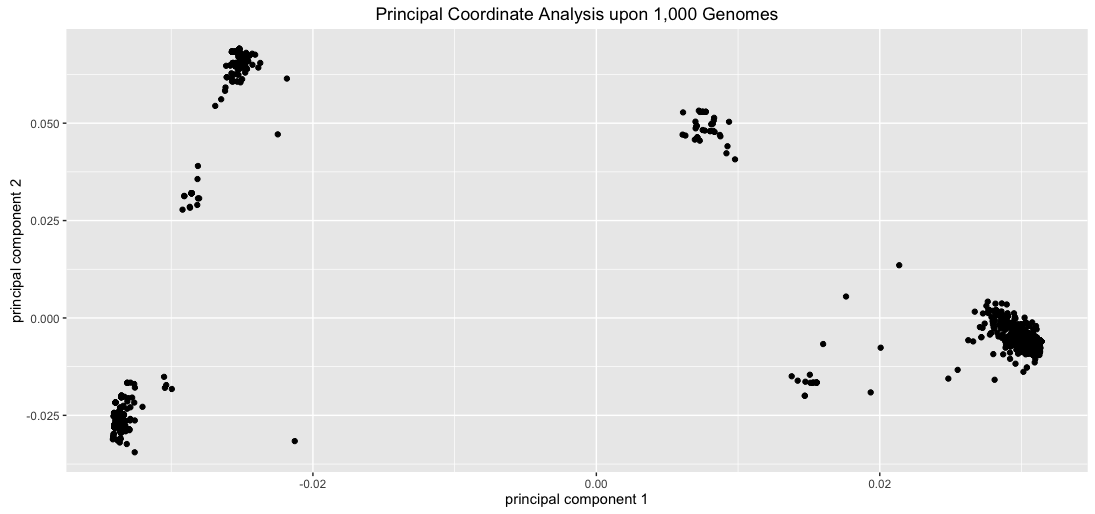

In [1]:
from IPython.display import Image
Image(filename='pca2variants.png')


## Compute Principal Coordinate Analysis on the chromosome 17

In [ ]:

```$ spark-submit \
>   --class com.google.cloud.genomics.spark.examples.VariantsPcaDriver \
>   --conf spark.shuffle.spill=true \
>   googlegenomics-spark-examples-assembly-2.0.jar \
>   --variant-set-id 10473108253681171589 \
>   --references 17:41196311:41277499\
>   --output-path gs://septbucket/output/chr17-brca1-pca.tsv
16/11/01 09:32:32 INFO com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystemBase: GHFS version: 1.5.4-hadoop2
Matrix size: 1095.
Running PCA on 1 datasets.
Variantset: 10473108253681171589; Refs: 17:41196311:41277499
Non zero rows in matrix: 1092 / 1095.                                           
[Stage 19:===================================================>     (9 + 1) / 10]16/11/01 09:33:05 INFO com.github.fommil.jni.JniLoader: successfully loaded /tmp/jniloader9065075091824021695netlib-native_system-linux-x86_64.so
16/11/01 09:33:06 INFO com.github.fommil.jni.JniLoader: already loaded netlib-native_system-linux-x86_64.so
HG00096	10473108253681171589	0.02778657950084994	-0.0061250775966083075
HG00097	10473108253681171589	-0.033592163915271867	-0.026040479900492644
HG00099	10473108253681171589	0.028479037219954144	-0.0067810018633501345
HG00100	10473108253681171589	0.029577924952043	-0.007412314295369402
HG00101	10473108253681171589	-0.0340110791668877	-0.024567344660251636
HG00102	10473108253681171589	0.031672705198176276	-0.00764817452433946
HG00103	10473108253681171589	-0.03412285490628576	-0.026220248900423432
HG00104	10473108253681171589	0.028232946022804857	-0.014718361617656361
HG00106	10473108253681171589	0.03020673300584021	-0.00674532005753898
HG00108	10473108253681171589	0.030272161411604596	-0.004971620224408874
HG00109	10473108253681171589	-0.03411082217297019	-0.026149253462997936

.... ..... .....
.... ..... .....

NA20805	10473108253681171589	0.030804500986306355	-0.007477806472586199
NA20806	10473108253681171589	0.03152902672641618	-0.007086425970144716
NA20807	10473108253681171589	0.02716905693313672	-0.004084833119868987
NA20808	10473108253681171589	0.029423009626619128	-0.00620880769508511
NA20809	10473108253681171589	-0.034116421493272334	-0.025992085249355007
NA20810	10473108253681171589	0.02716668725282229	-0.005291674565216749
NA20811	10473108253681171589	0.02863087915793117	-0.008456233951873794
NA20812	10473108253681171589	0.03097038692181892	-0.006755469223823779
NA20813	10473108253681171589	0.030803480199616342	-0.0074758228609393945
NA20814	10473108253681171589	0.02865238920148143	-0.008084003476918936
NA20815	10473108253681171589	0.02879869573660803	-0.0037557899640217416
NA20816	10473108253681171589	0.026104805529612075	-0.010430718823329308
NA20818	10473108253681171589	-0.03360957664500581	-0.026655905606186213
NA20819	10473108253681171589	0.032019557126552134	-0.007757509838427432
NA20826	10473108253681171589	0.030266079172840434	-0.009102704080926961
NA20828	10473108253681171589	-0.03412964005321163	-0.02599169766159093
NA21313	10473108253681171589	-0.03401702847363711	-0.024555217139986922
Variants API stats:                                                             
-------------------------------
# of partitions: 1
# of bases requested: 81188
# of variants read: 879
# of API requests: 0
# of unsuccessful responses: 0
# of IO exceptions: 0

gsutil cat gs://septbucket/output/chr17-brca1-pca.tsv-pca.tsv/*   | sort > chr17-brca1-pca.tsv


pca_1kg <- read.table("/Users/surajjoshi/chr17-brca1-pca.tsv.tsv", col.names=c("Sample", "PC1", "PC2", "Delta"))
pca_1kg

require(scales) # for scientific_format()
require(ggplot2)
ggplot(pca_1kg) +
  geom_point(aes(x=PC1, y=PC2)) +
  xlab("principal component 1") +
  ylab("principal component 2") +
  ggtitle("Principal Coordinate Analysis upon 1,000 Genomes")

```


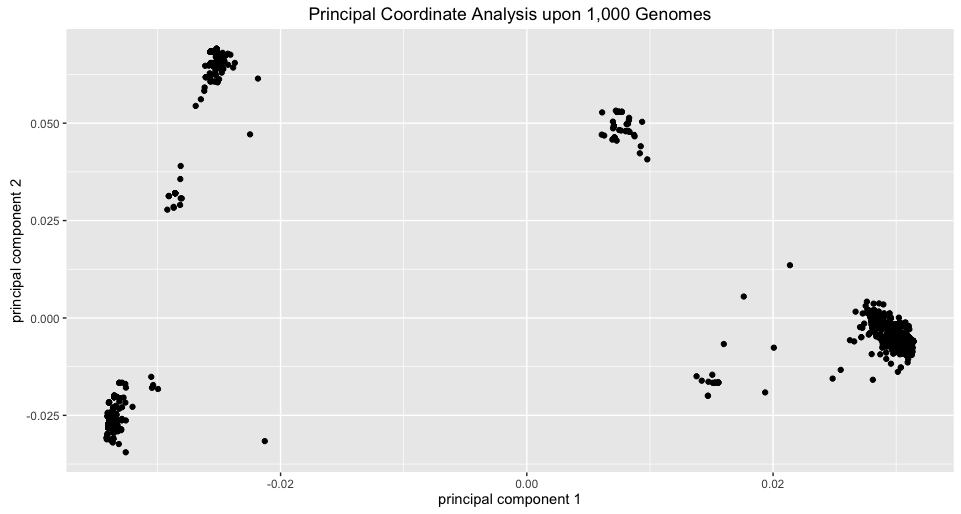

In [6]:
from IPython.display import Image
Image(filename='chr17_pca.png')


#### Running Principal Coordinate Analysis ( Automated Process) Using Spark

1. gcloud beta dataproc clusters create cluster-1 --scopes cloud-platform
2. gcloud compute ssh cluster-1-m
3. git clone https://github.com/rpoudel3/Google_Genomics
4. cd Google_Genomics
5. chmod u+x initial_setup.sh
6. ./initial_setup.sh
7. Submit the spark job

## Querying using Big Query

#### Examining the variant counts for each individual of heterozygous reference variants (where one of the alleles 
#### is equal to the reference) and heterozygous alternate variants (where neither of the alleles is equal to the reference).



#### Sample structure of the source table from the 1000 genomes variant set schema is given below:

| reference_name           | STRING  | NULLABLE |
|--------------------------|---------|----------|
| start                    | INTEGER | NULLABLE |
| end                      | INTEGER | NULLABLE |
| reference_bases          | STRING  | NULLABLE |
| alternate_bases          | STRING  | REPEATED |
| quality                  | FLOAT   | NULLABLE |
| filter                   | STRING  | REPEATED |
| names                    | STRING  | REPEATED |
| call                     | RECORD  | REPEATED |
| call.call_set_id         | STRING  | NULLABLE |
| call.call_set_name       | STRING  | NULLABLE |
| call.genotype            | INTEGER | REPEATED |
| call.phaseset            | STRING  | NULLABLE |
| call.genotype_likelihood | FLOAT   | REPEATED |
| call.DP                  | INTEGER | NULLABLE |
| call.DS                  | FLOAT   | NULLABLE |
| call.FT                  | STRING  | NULLABLE |
| call.GQ                  | STRING  | NULLABLE |
| call.PL                  | INTEGER | REPEATED |
| call.SP                  | INTEGER | NULLABLE |
| ....                  | .... | .... |

#### Query

In [ ]:
from IPython.display import Image
Image(filename='chr17_pca.png')